In [2]:
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.stats import norm;

# Regresión lineal simple

### Conjunto de datos

Un conjuntos de $ n $ observaciones $ \begin{Bmatrix} (x_1, y_1) , (x_2, y_2), \cdots (x_n, y_n) \end{Bmatrix} $.
También conocidos como datos de entrenamiento


Text(0, 0.5, '$y$')

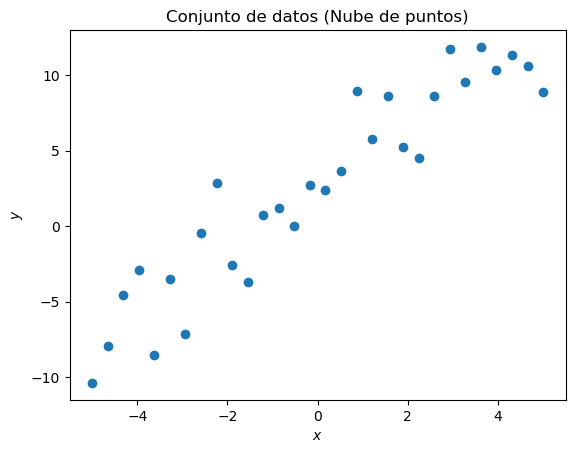

In [3]:
numSamples = 30; 
x = np.linspace(-5, 5, numSamples);
y = (2 * x + 3) + np.random.normal(0, 2, numSamples);

fig1, ax1 = plt.subplots()
ax1.scatter(x, y)
ax1.set_title("Conjunto de datos (Nube de puntos)")
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")

Se asume una relación de la forma (para $ i=1, ..., n $):

$$ y_i = f(x_i) + \epsilon $$

- $ f(x_i) $ representa la información que $ x_i $ nos da a conocer de $ y_i $.
- $ \epsilon $ es el término de error.

### ¿Es posible ajusta un modelo o función a mis datos?
### ¿Puedo representar mis datos a través de una relación expresada por la función $ f(x_i) $ ?

### Modelo lineal simple

$$ \hat{y_i} = f(x_i) = \beta_0 + \beta_1 x_i $$

- $ \beta_0 $ y $ \beta_1 $ son parámetros del modelo.
- $ \hat{\beta_0} $ y $ \hat{\beta_1} $ son los parámetros estimados del modelo, obtenidos a través de los datos de entrenamiento.


Se busca estimar los parámetros $ \hat{\beta_0} $ y $ \hat{\beta_1} $, tal que la línea resultante este tan cerca como sea posible a los puntos del conjunto de datos.

Tiene un enfoque supervisado. Lo que se busca es encontrar una respuesta cuantitativa $ y_i $ con base en una única variable predictora $ x_i $.

$$ y_i \approx \hat{\beta_0} + \hat{\beta_1} x_i $$

- $ \beta_0 $ y $ \beta_1 $ son parámetros del modelo.
- $ \hat{\beta_0} $ y $ \hat{\beta_1} $ son los parámetros estimados del modelo, obtenidos a través de los datos de entrenamiento.

### Criterio de mínimos cuadrados

Forma de medir la cercanía de la la línea con el conjunto de datos.

#### El residual

$$ e_i = y_i - \hat{y_i}  = y_i - (\beta_0 + \beta_1 x_i)$$

- $ y_i $ valor de $ i $-ésima respuesta observada $ \hat{y}_i $ es el valor de la respuesta $ i $-ésima predicha por el modelo.

#### Suma residual de cuadrados (RSS)

$$ RSS = e_1^2 + e_2^2 + \cdots + e_n^2 $$

**El obejtivo es estimar los parámetros $ \hat{\beta_0} $ y $ \hat{\beta_1} $ para minimizar el RSS**

#### Forma matricial

##### La entrada

$$ \bf{X} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n  \end{bmatrix} $$

##### El modelo

$$ \bf{\hat{Y}} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n  \end{bmatrix} \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix} = \begin{bmatrix} \hat{y_1} \\ \hat{y_2} \\ \vdots \\ \hat{y_n} \end{bmatrix} = \bf{X} \bf{\beta}$$

##### Suma residual de cuadrados

$$ \bf{e} = \begin{bmatrix} e_1^2 \\ e_2^2 \\ \vdots \\ e_n^2 \end{bmatrix} = \begin{bmatrix} (y_1 - \hat{y_1})^2 \\ (y_2 - \hat{y_2})^2 \\ \vdots \\ (y_n - \hat{y_n})^2 \end{bmatrix} = (\bf{y} - \bf{\hat{Y}})^T (\bf{y} - \bf{\hat{Y}}) = (\bf{y} - \bf{X} \bf{\beta})^T (\bf{y} - \bf{X} \bf{\beta}) $$

### Problema de optimización

**El obejtivo es estimar los parámetros $ \hat{\beta_0} $ y $ \hat{\beta_1} $ para minimizar el RSS**

$$ \bf{e(\bf{\beta})} = \frac{1}{2}(\bf{y} - \bf{X} \bf{\beta})^T (\bf{y} - \bf{X} \bf{\beta}) $$

$$ \bf{\hat{\beta}} = \bf{\beta^*} = arg\ \underset{\bf{\beta}}{min} \ \bf{e(\beta)} = arg\ \underset{\bf{\beta}}{min} \frac{1}{2}(\bf{y} - \bf{X} \bf{\beta})^T (\bf{y} - \bf{X} \bf{\beta}) $$

Se encuentra el mínimo a través de la derivada.

$$ \frac{d \bf{e(\bf{\beta})}}{d\bf{\beta}} = 0 $$

$$ \frac{d \bf{e(\bf{\beta})}}{d\bf{\beta}} = \frac{d \bf{\frac{1}{2} (\bf{y}^T\bf{y} - \bf{y}^T\bf{X}\bf{\beta} - (\bf{X}\bf{\beta})^T\bf{y} + (\bf{X}\bf{\beta})^T \bf{X}\bf{\beta} )}}{d\bf{\beta}} $$

$$ \frac{d \bf{e(\bf{\beta})}}{d\bf{\beta}} = \frac{1}{2} (-2 \bf{y}^T\bf{X} + 2\bf{X}^T \bf{X}\bf{\beta} )= \bf{0}$$

$$ \bf{\hat{\beta}} = (\bf{X}^T \bf{X})^{-1}\bf{X}^T\bf{y}$$

parámetros beta_0:  2.8235725634096784
parámetros beta_1:  2.1239919299554773
error e(beta) =  53.43986815301479


Text(0, 0.5, '$y$')

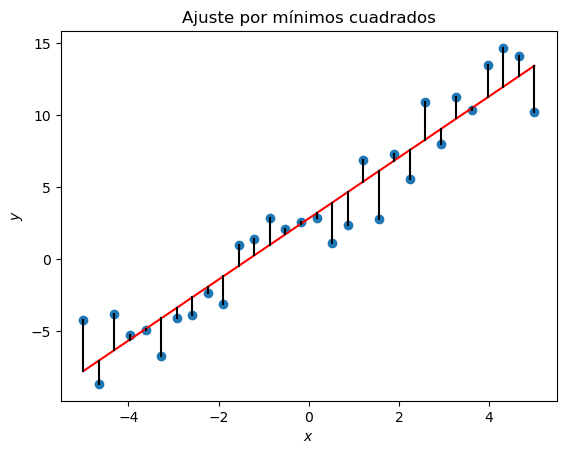

In [4]:
numSamples = 30;
BETA_0, BETA_1 = 0, 1;
x = np.linspace(-5, 5, numSamples);
X = np.c_[np.ones(numSamples), x]
y = (2 * x + 3) + np.random.normal(0, 2, numSamples);

# resolver el problema
beta = np.linalg.inv(X.T @ X) @ X.T @ y

print("parámetros beta_0: ", beta[BETA_0])
print("parámetros beta_1: ", beta[BETA_1])

print("error e(beta) = ", 0.5*(y - X @ beta).T @ (y - X @ beta))

fig2, ax2 = plt.subplots()
ax2.scatter(x, y)
ax2.set_title("Ajuste por mínimos cuadrados")
ax2.plot(x, beta[BETA_0] + beta[BETA_1] * x,"r")

ax2.plot(np.c_[x, x].T, np.c_[y, beta[BETA_0] + beta[BETA_1] * x].T, 'k')
ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$y$")


In [5]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(np.reshape(x, (len(x), 1)), np.reshape(y, (len(x), 1)))

print("Coeficientes: \n", regr.coef_)
print("Intercepto: \n", regr.intercept_)


Coeficientes: 
 [[2.12399193]]
Intercepto: 
 [2.82357256]


# Regresión lineal múltiple

$$ y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon $$

##### El modelo

$$ \bf{\hat{Y}} = \begin{bmatrix} 1 & x_{1,1} & \cdots & x_{1,p} \\ 1 & x_{2,1} & \cdots & x_{2,p}  \\ \vdots & \vdots& \ddots &\vdots \\ 1 & x_{n,1} & \cdots & x_{n,p}   \end{bmatrix} \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_n \end{bmatrix} = \begin{bmatrix} \hat{y_1} \\ \hat{y_2} \\ \vdots \\ \hat{y_n} \end{bmatrix} = \bf{X} \bf{\beta}$$

$$ \bf{\hat{\beta}} = (\bf{X}^T \bf{X})^{-1}\bf{X}^T\bf{y}$$

- Well : well index
- Por : well average porosity (%)
- Perm : permeability (mD)
- AI : accoustic impedance (kg/m2s*10^6)
- Brittle : brittleness ratio (%)
- TOC : total organic carbon (%)
- VR : vitrinite reflectance (%)
- Prod : gas production per day (MCFD) - Response Variable

parámetros beta_0:  -2003.0141117392268
parámetros beta_1:  320.3940088865941
parámetros beta_2:  31.376622365559207
Coeficientes: 
 [320.39400889  31.37662237]
Intercepto: 
 -2003.0141117390176


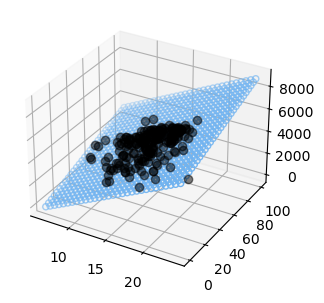

In [6]:
import pandas as pd

BETA_0, BETA_1, BETA_2 = 0, 1, 2;
file = 'https://aegis4048.github.io/downloads/notebooks/sample_data/unconv_MV_v5.csv'
df = pd.read_csv(file)
df.head(10)

Xdata = df[['Por', 'Brittle']].values.reshape(-1,2)
Y = df['Prod']

x1 = Xdata[:, 0]
x2 = Xdata[:, 1]
X = np.c_[np.ones(len(x1)), x1, x2]
y = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
datos_3d = np.c_[np.ones(len(xx_pred.flatten())), xx_pred.flatten(), yy_pred.flatten()]

# resolver el problema
beta = np.linalg.inv(X.T @ X) @ X.T @ y

datos_y_3d = datos_3d @ beta;

#predecido = model.predict(model_viz)

print("parámetros beta_0: ", beta[BETA_0])
print("parámetros beta_1: ", beta[BETA_1])
print("parámetros beta_2: ", beta[BETA_2])

regr = linear_model.LinearRegression()
regr.fit(Xdata, y)

print("Coeficientes: \n", regr.coef_)
print("Intercepto: \n", regr.intercept_)

fig = plt.figure(figsize=(12, 4))
ax  = fig.add_subplot(131, projection='3d')

ax.plot(x1, x2, y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), datos_y_3d, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')


### Evaluación de la presición del modelo

La medida en que el modelo se ajusta a los datos

- $ RSE $ (Error estandar residual) Error del término $ \epsilon $, valor estimado de la desviación estandar de $ \epsilon $
- $ R^2 $ estadístico.

$$RSE = \sqrt{\frac{1}{n-2}RSS}$$

- $ \uparrow RSE $ El modelos no ajusta bien a los datos
- $ \downarrow RSE $ $ \hat{y_i} \approx  y_i $

$$ R^2 = \frac{TSS - RSS}{TSS} $$

- $ TSS = \sum (y_i - \bar{y})^2 $ suma total de cuadrados.

Proporciona una medida alternativa de ajuste del modelo (valor entre 0 y 1)

- $ R^2 $ tiende a cero el modelo lineal no es el apropiado.